
Business Objective:
A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.
Data Set Details:
This is a project where the variable to be predicted is energy production
The data file contains 9568 observations with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load.

The variables, or features, are the following:
temperature, in degrees Celsius.
exhaust_vacuum, in cm Hg.
amb_pressure, in millibar. (Ambient pressure)
r_humidity, in percentage. (Relative humidity)
energy_production, in MW, net hourly electrical energy output.


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading data

In [2]:
df= pd.read_csv('energy production.csv')
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.shape

(9568, 5)

## Checking for null values

In [5]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [6]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Removing Duplicates

In [7]:
df.duplicated().sum()

41

In [8]:
df= df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

## Outlier Treatment
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.

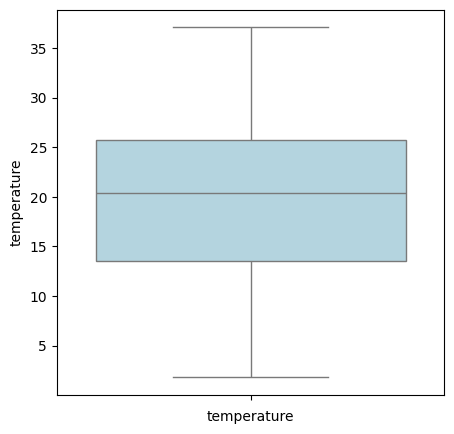

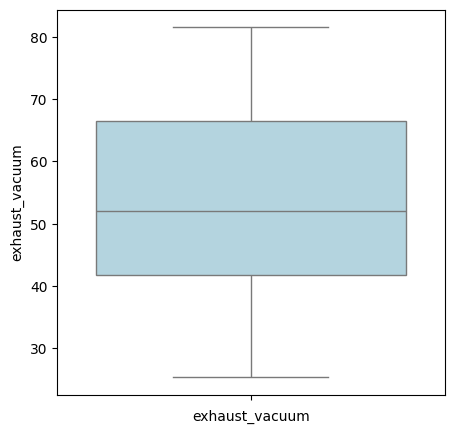

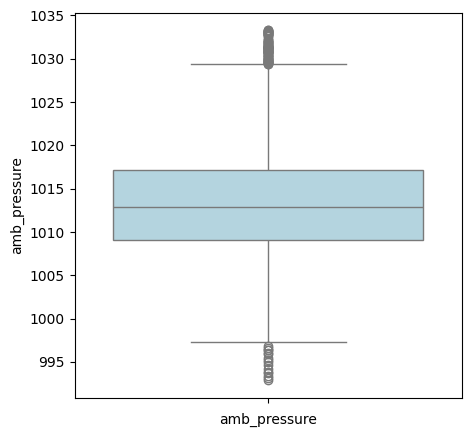

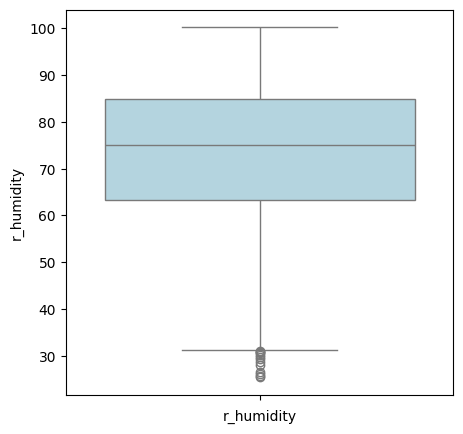

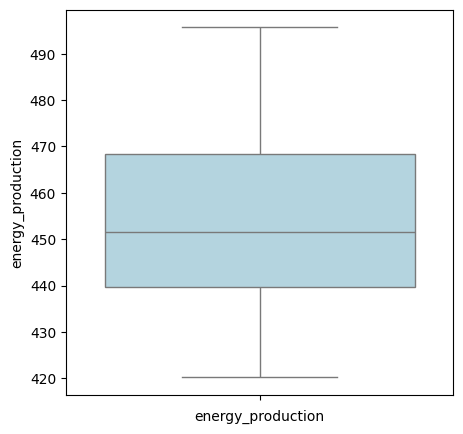

In [10]:
def boxplots(col):
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col], color= 'lightblue')
    plt.xlabel(col) # Set the x-axis label to the column name
    plt.show()

for i in list(df.columns):
    boxplots(i)

There are outliers in Ambient Pressure (AP) and Relative Humidity (RH).

In [11]:
df1= df.copy()

In [12]:
Q1 = df['amb_pressure'].quantile(0.25)
Q3 = df['amb_pressure'].quantile(0.75)
IQR = Q3 - Q1
high_limit = Q3 + 1.5*IQR
low_limit = Q1 - 1.5*IQR

In [13]:
df1['amb_pressure'] = np.where(df1['amb_pressure'] > high_limit,high_limit,
                                  np.where(df1['amb_pressure']<low_limit,low_limit,df1['amb_pressure']))

In [14]:
Q1 = df['r_humidity'].quantile(0.25)
Q3 = df['r_humidity'].quantile(0.75)
IQR = Q3 - Q1
high_limit = Q3 + 1.5*IQR
low_limit = Q1 - 1.5*IQR

In [15]:
df1['r_humidity'] = np.where(df1['r_humidity'] > high_limit,high_limit,
                                  np.where(df1['r_humidity']<low_limit,low_limit,df1['r_humidity']))

## EDA

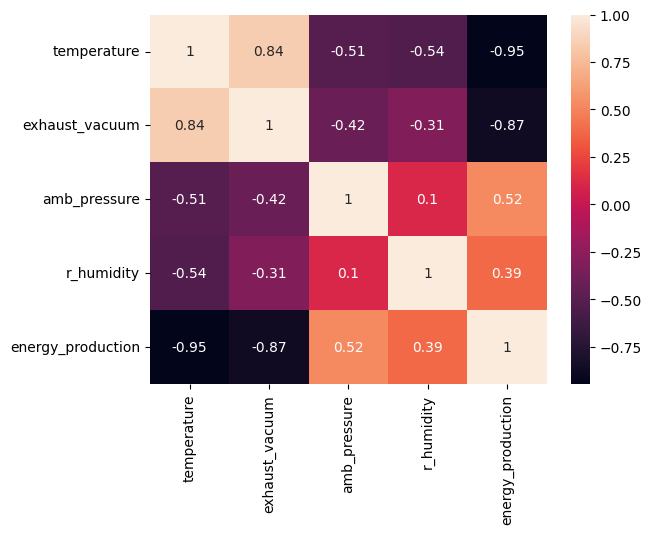

In [16]:
sns.heatmap(df1.corr(), annot= True);

The correlation heatmap shows a strong correlation between Temperature & exhaust vaccum. lets explore this correlation

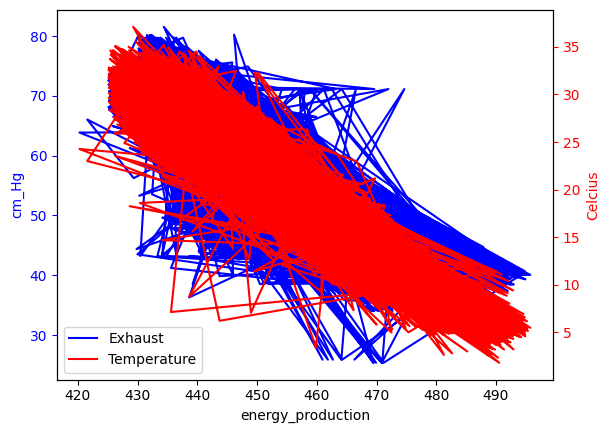

In [17]:
fig, ax1= plt.subplots()

ax1.plot(df1['energy_production'], df1['exhaust_vacuum'], 'b', label= 'Exhaust')
ax1.set_xlabel('energy_production')
ax1.set_ylabel('cm_Hg', color= 'b')
ax1.tick_params('y', colors= 'b')

ax2= ax1.twinx()

ax2.plot(df1['energy_production'], df1['temperature'], 'r', label= 'Temperature')
ax2.set_ylabel('Celcius', color= 'r')
ax2.tick_params('y', colors= 'r')

lines1, labels1= ax1.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()
lines= lines1 + lines2
labels= labels1 + labels2
ax1.legend(lines, labels, loc= 'lower left')

plt.show()

In the plot, we can see that with higher Temperature and Exhaust Vaccum the energy production is low, and with lower Temperature and Exhaust Vaccum the energy production is high.

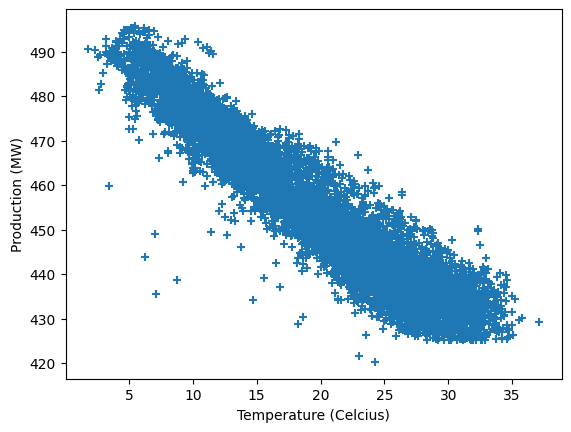

In [18]:
plt.scatter(df1['temperature'], df1['energy_production'], marker= '+')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Production (MW)')
plt.show()

In the above scatter plot, we can see that higher Temperature leads to lower energy production

In [19]:
df1.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

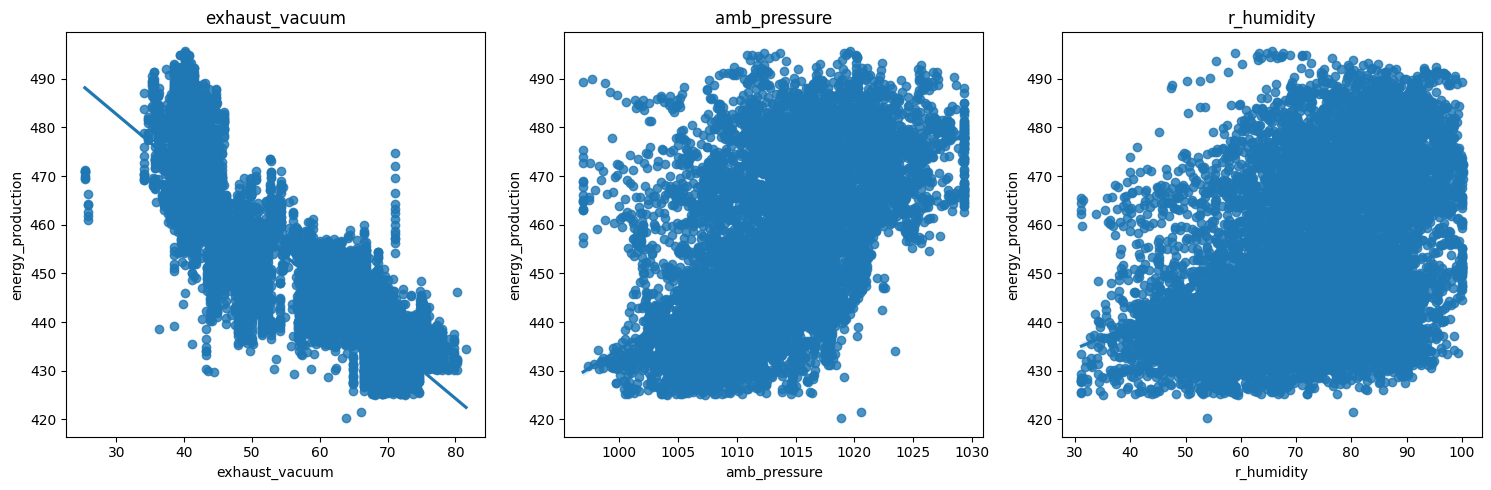

In [20]:
col= ['exhaust_vacuum', 'amb_pressure', 'r_humidity']

fig= plt.figure(figsize= (20,5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    plt.title(col[i])
    sns.regplot(data= df1, x=df1[col[i]], y= df1['energy_production'])

plt.tight_layout()

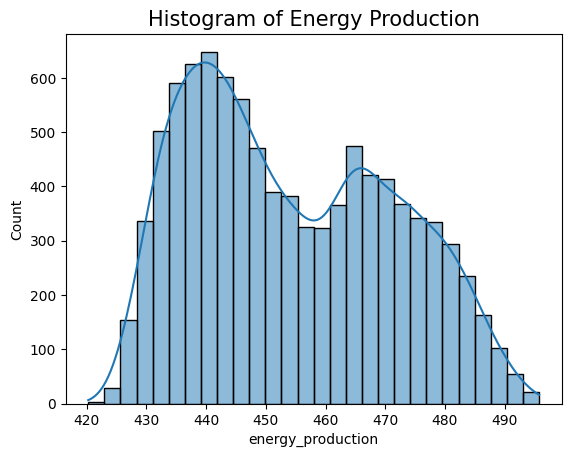

In [21]:
# Histogram of units with kernel density estimate
sns.histplot(df1['energy_production'], kde= True).set_title('Histogram of Energy Production', fontsize= 15)
plt.show();

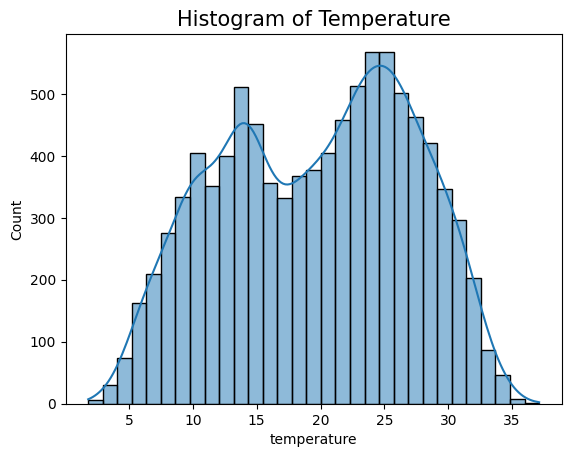

In [22]:
sns.histplot(df1['temperature'], kde= True).set_title('Histogram of Temperature', fontsize= 15)
plt.show();

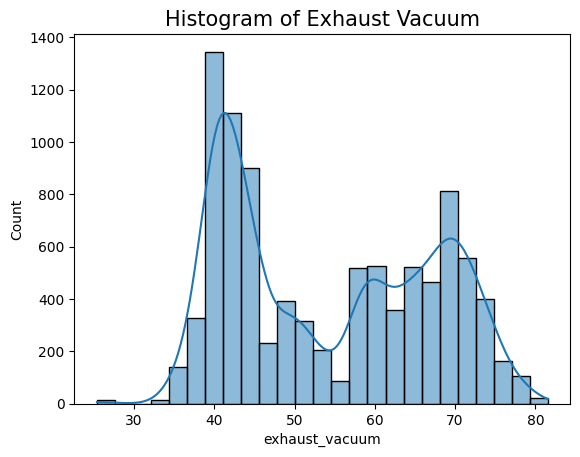

In [23]:
sns.histplot(df1['exhaust_vacuum'], kde= True).set_title('Histogram of Exhaust Vacuum', fontsize= 15)
plt.show();

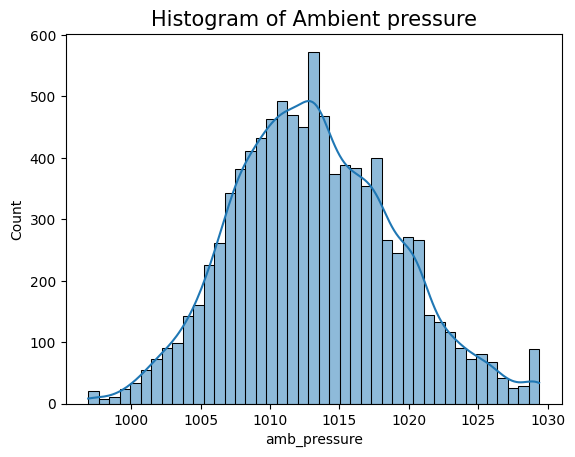

In [24]:
sns.histplot(df1['amb_pressure'], kde= True).set_title('Histogram of Ambient pressure', fontsize= 15)
plt.show();

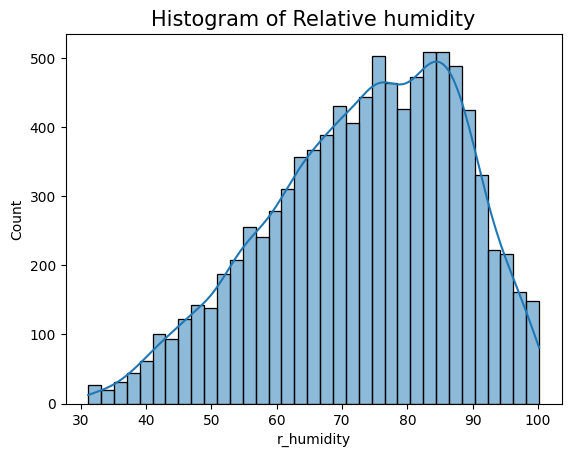

In [25]:
sns.histplot(df1['r_humidity'], kde= True).set_title('Histogram of Relative humidity', fontsize= 15)
plt.show();

In [26]:
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## Feature Selection

In [27]:
X = df.drop('energy_production',axis=1) # Features
y = df['energy_production'] # Target

In [28]:
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [29]:
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9527, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

# Convert y_train and y_test to NumPy arrays
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [32]:
correlation_matrix = df.corr()
print(correlation_matrix['energy_production'])

temperature         -0.947908
exhaust_vacuum      -0.869900
amb_pressure         0.518687
r_humidity           0.391175
energy_production    1.000000
Name: energy_production, dtype: float64


1. Temperature and exhaust vacuum have strong negative correlations with energy production.
2. Ambient pressure has a moderate positive correlation with energy production.
3. Relative humidity has a weak positive correlation with energy production.

### 1. SelectKBest:

Uses statistical tests to select features.
You specify the number of top features (k) to keep.
It's simple and easy to understand.
May work well if your features have a linear relationship with the target.

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor

# Create SelectKBest with f_regression
k_best = SelectKBest(score_func=f_regression, k='all')
# Fit and transform the feature set
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)
# Get the selected feature names
selected_feature_names = X.columns[k_best.get_support()]
# Display selected feature names
print("Selected Features:", selected_feature_names)

Selected Features: Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Building
## 1. Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the metrics
print("Random Forest Regressor Metrics:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R2 Score: {r2_rf}")

<ipython-input-34-61da87dd7e4c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Regressor Metrics:
MSE: 0.04659469527051655
RMSE: 0.215858044257138
MAE: 0.15438569929380896
R2 Score: 0.9534053047294835


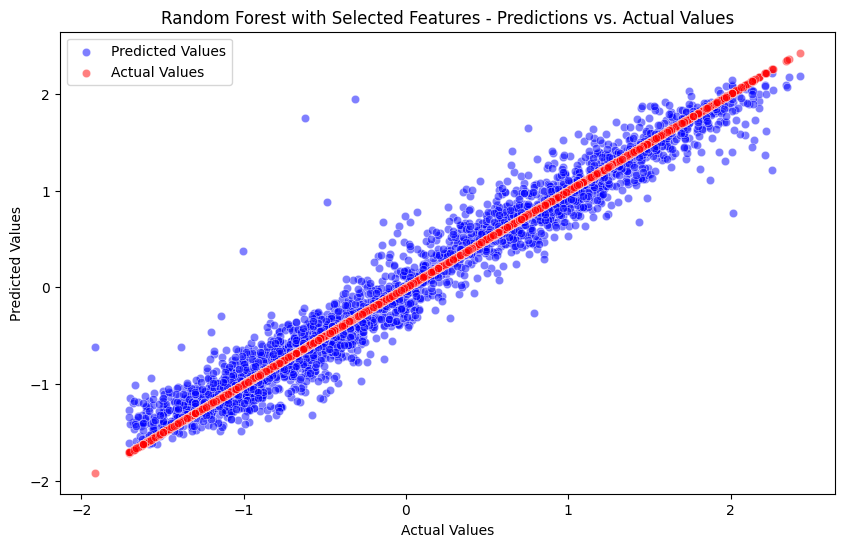

In [35]:
# Scatter plot for RandomForestRegressor with selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_rf.ravel(), label='Predicted Values', color='blue', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='red', alpha=0.5)
plt.title("Random Forest with Selected Features - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

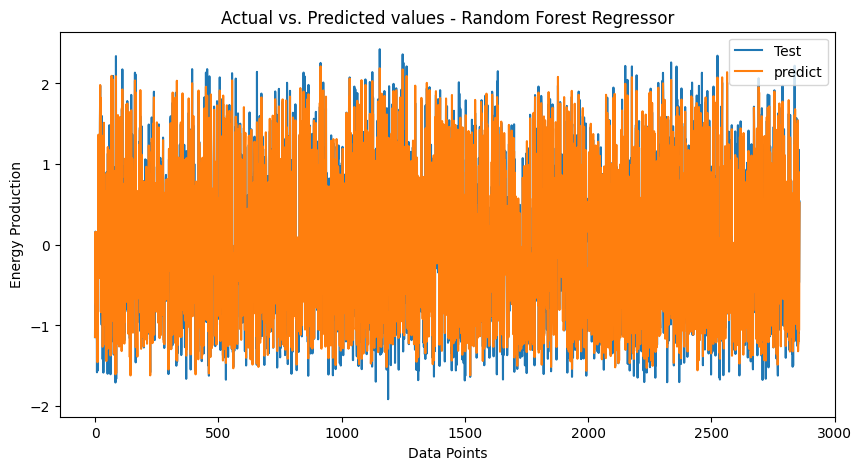

In [36]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_rf, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - Random Forest Regressor')
plt.show()

## 2.  Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the metrics
print("Linear Regression Metrics:")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression Metrics:
MSE: 0.07011400779955608
RMSE: 0.2647904979404587
MAE: 0.21143611629246578
R2 Score: 0.9298859922004439


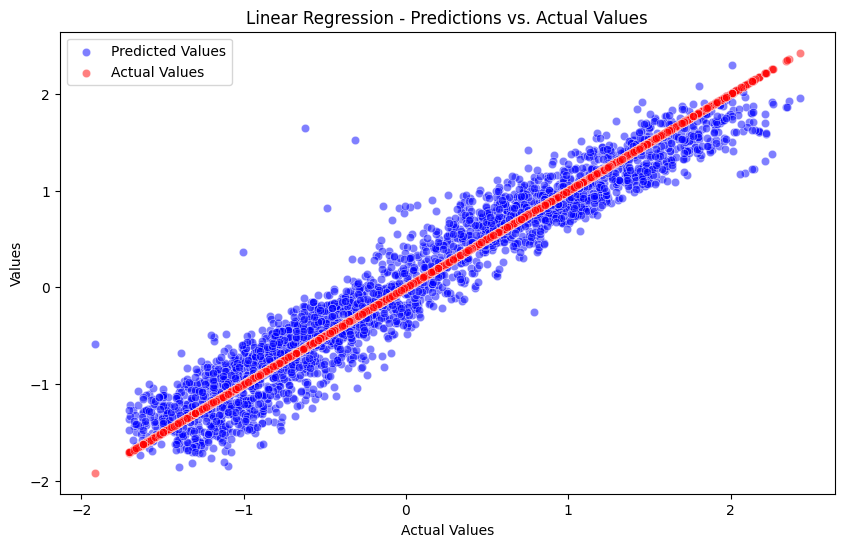

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_lr.ravel(), label='Predicted Values', color='blue', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='red', alpha=0.5)
plt.title("Linear Regression - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Values")
plt.legend()
plt.show();

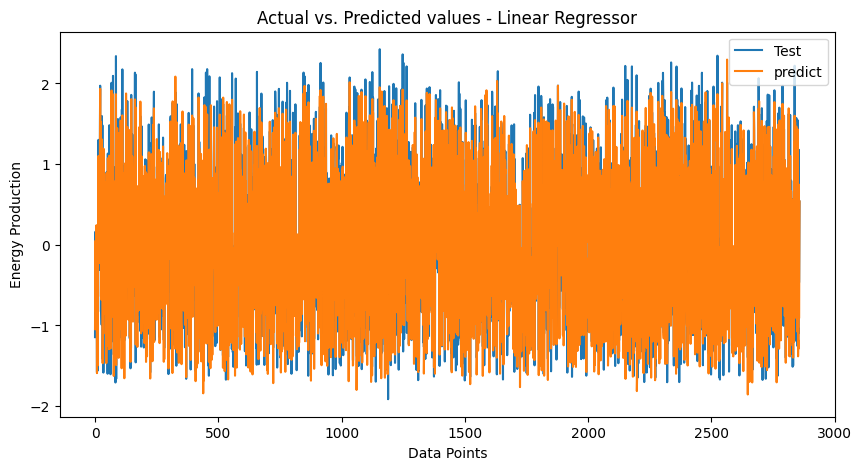

In [39]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_lr, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - Linear Regressor')
plt.show()

## 3. Support Vector Regression

In [40]:
from sklearn.svm import SVR

In [41]:
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calculate evaluation metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print the metrics
print("Support Vector Regression Metrics:")
print(f"MSE: {mse_svm}")
print(f"RMSE: {rmse_svm}")
print(f"MAE: {mae_svm}")
print(f"R2 Score: {r2_svm}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression Metrics:
MSE: 0.05445032996477407
RMSE: 0.23334594482179044
MAE: 0.1751575887270451
R2 Score: 0.9455496700352259


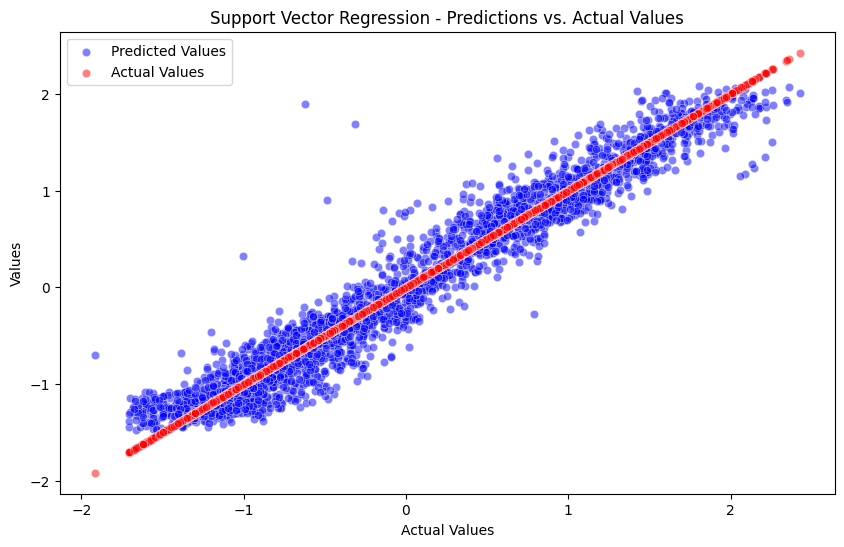

In [42]:
# Scatter plot for Support Vector Regression (SVR)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_svm.ravel(), label='Predicted Values', color='blue', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='red', alpha=0.5)
plt.title("Support Vector Regression - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Values")
plt.legend()
plt.show();

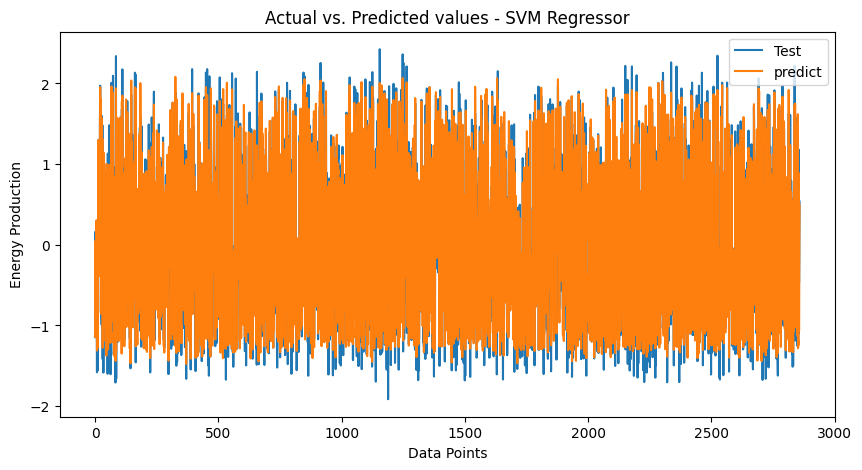

In [43]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_svm, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - SVM Regressor')
plt.show()

## 4. Gradient Boosting Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the metrics
print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gb}")
print(f"RMSE: {rmse_gb}")
print(f"MAE: {mae_gb}")
print(f"R2 Score: {r2_gb}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics:
MSE: 0.054609019488368805
RMSE: 0.23368572803739815
MAE: 0.17594178680377934
R2 Score: 0.9453909805116312


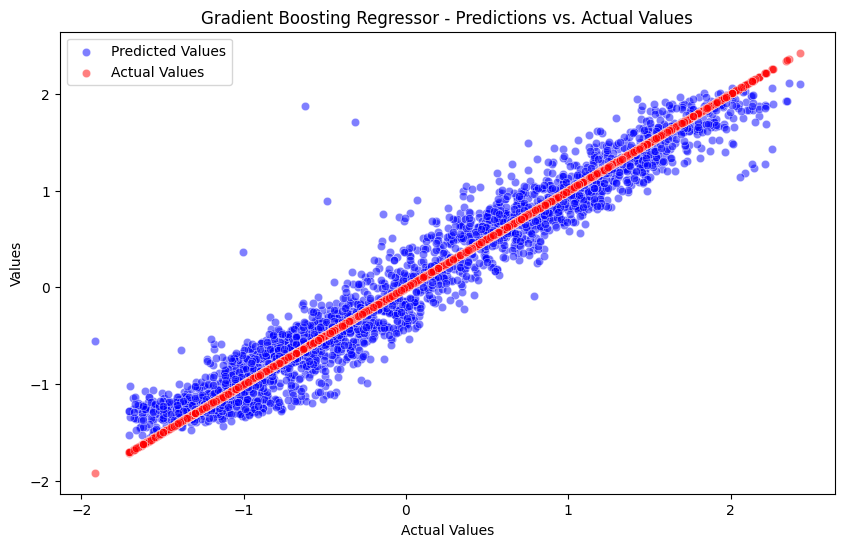

In [45]:
# Scatter plot for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_gb.ravel(), label='Predicted Values', color='blue', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='red', alpha=0.5)
plt.title("Gradient Boosting Regressor - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Values")
plt.legend()
plt.show()

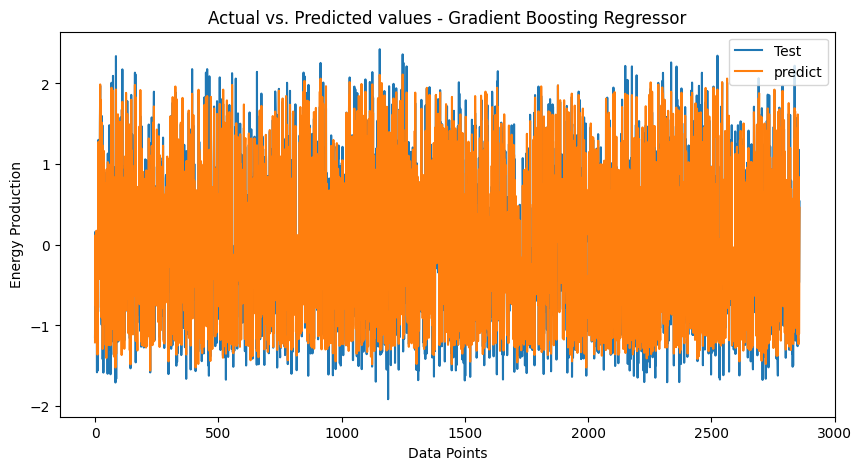

In [46]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_gb, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - Gradient Boosting Regressor')
plt.show()
plt.show()

## 5. LightGBM regressor

In [47]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculate evaluation metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print the metrics
print("LightGBM Regressor Metrics:")
print(f"MSE: {mse_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"MAE: {mae_lgb}")
print(f"R2 Score: {r2_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6668, number of used features: 4
[LightGBM] [Info] Start training from score -0.000000
LightGBM Regressor Metrics:
MSE: 0.049664009402450304
RMSE: 0.22285423353046338
MAE: 0.1618808173766216
R2 Score: 0.9503359905975497


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


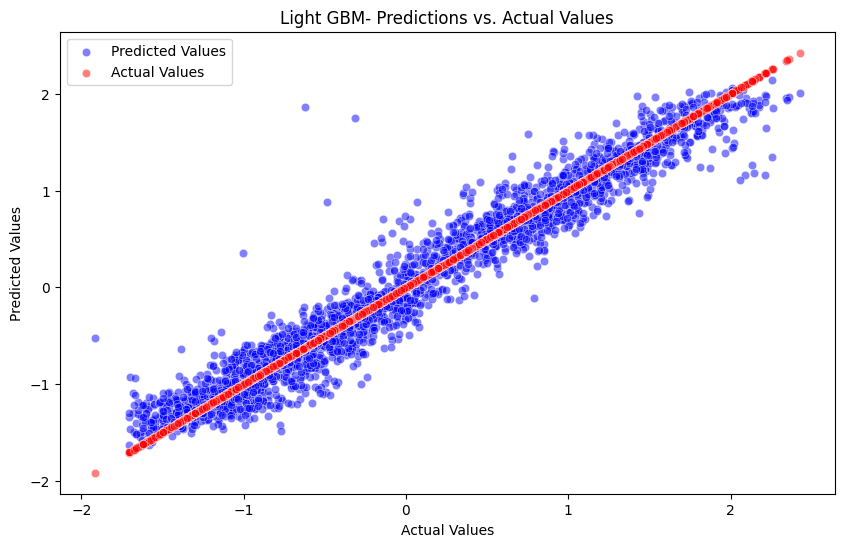

In [48]:
# Scatter plot for Light GBM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_lgb.ravel(), label='Predicted Values', color='blue', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='red', alpha=0.5)
plt.title("Light GBM- Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

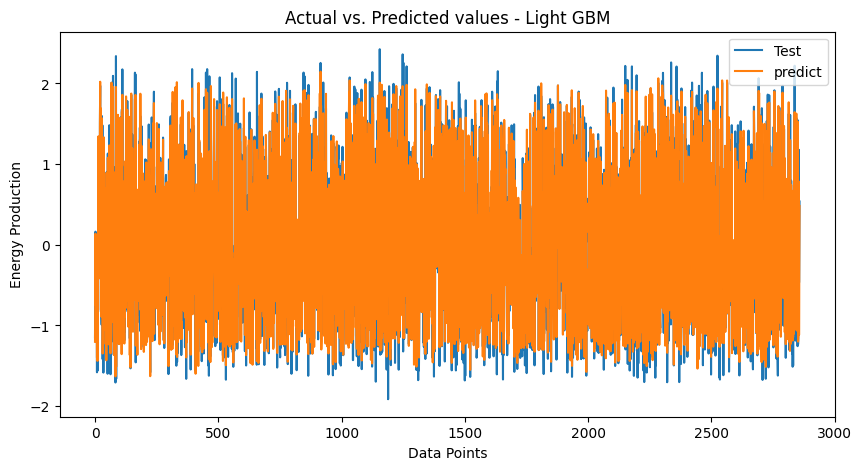

In [49]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_lgb, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - Light GBM')
plt.show()

## 6. K-Nearest Neighbors regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors regressor
knn_model = KNeighborsRegressor()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate evaluation metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the metrics
print("K-Nearest Neighbors Regressor Metrics:")
print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"MAE: {mae_knn}")
print(f"R2 Score: {r2_knn}")

K-Nearest Neighbors Regressor Metrics:
MSE: 0.0508150535664996
RMSE: 0.22542194561865445
MAE: 0.16451705159893287
R2 Score: 0.9491849464335004


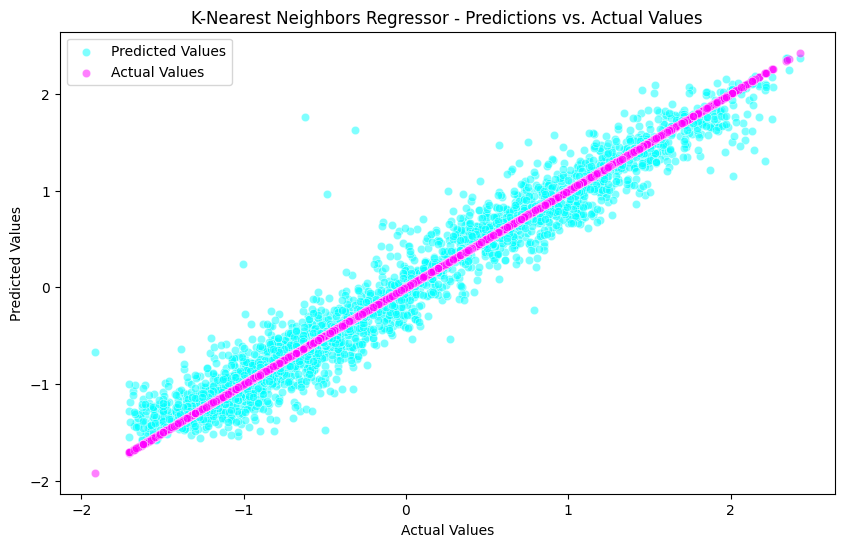

In [51]:
# Scatter plot for K-Nearest Neighbors Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_knn.ravel(), label='Predicted Values', color='cyan', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='magenta', alpha=0.5)
plt.title("K-Nearest Neighbors Regressor - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

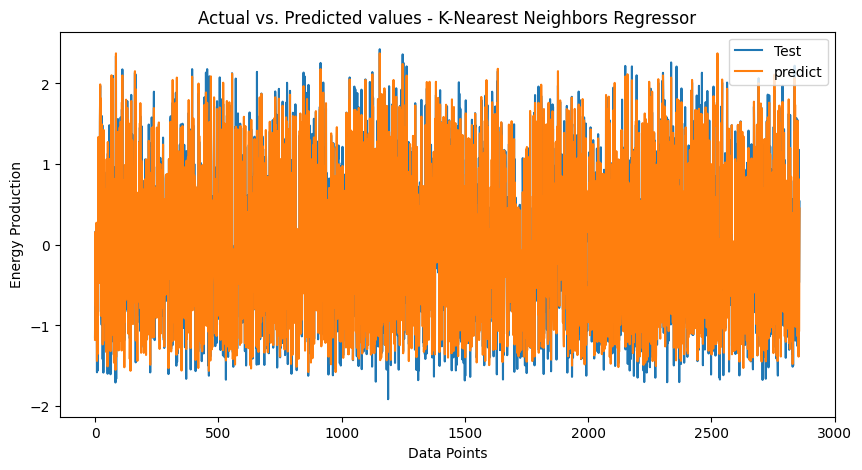

In [52]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_knn, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - K-Nearest Neighbors Regressor')
plt.show()

## 7. Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the metrics
print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAE: {mae_dt}")
print(f"R2 Score: {r2_dt}")

Decision Tree Regressor Metrics:
MSE: 0.09483367001781923
RMSE: 0.3079507590797906
MAE: 0.20840030403100546
R2 Score: 0.9051663299821808


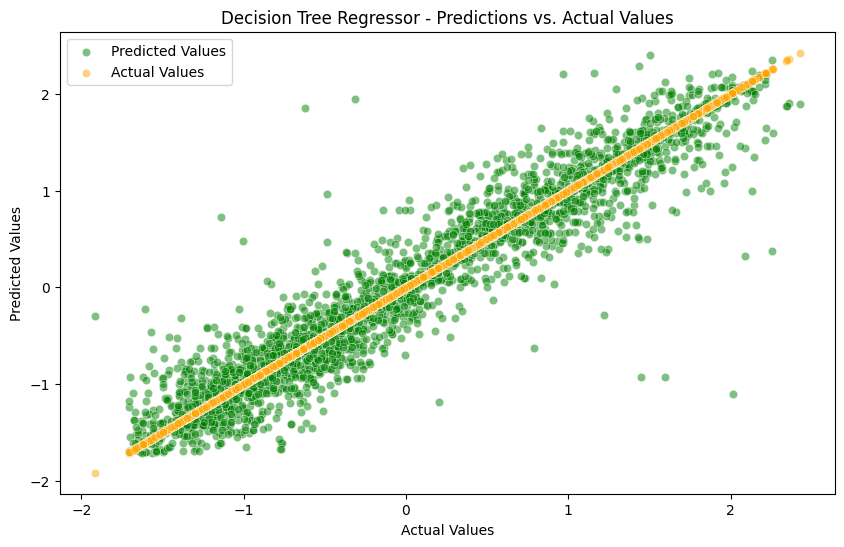

In [54]:
# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred_dt.ravel(), label='Predicted Values', color='green', alpha=0.5)
sns.scatterplot(x=y_test.ravel(), y=y_test.ravel(), label='Actual Values', color='orange', alpha=0.5)
plt.title("Decision Tree Regressor - Predictions vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

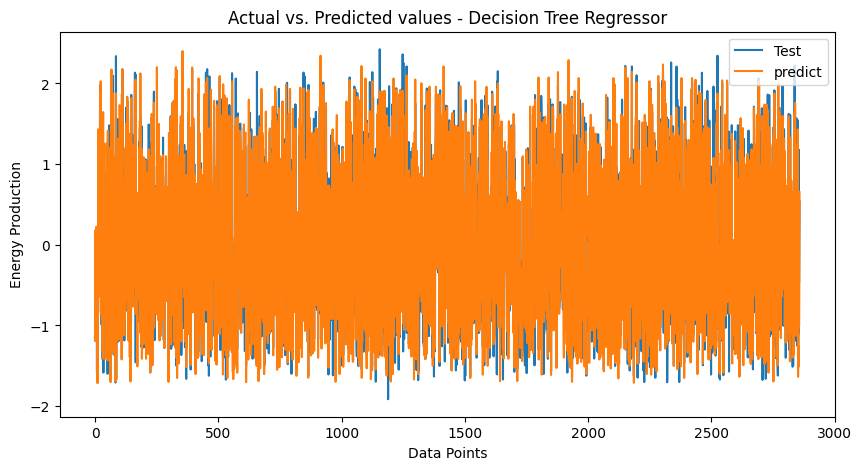

In [55]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(y_pred_dt, label = 'predict')
plt.xlabel('Data Points')
plt.ylabel('Energy Production')
plt.legend()
plt.title('Actual vs. Predicted values - Decision Tree Regressor')
plt.show()

## Model Evaluation

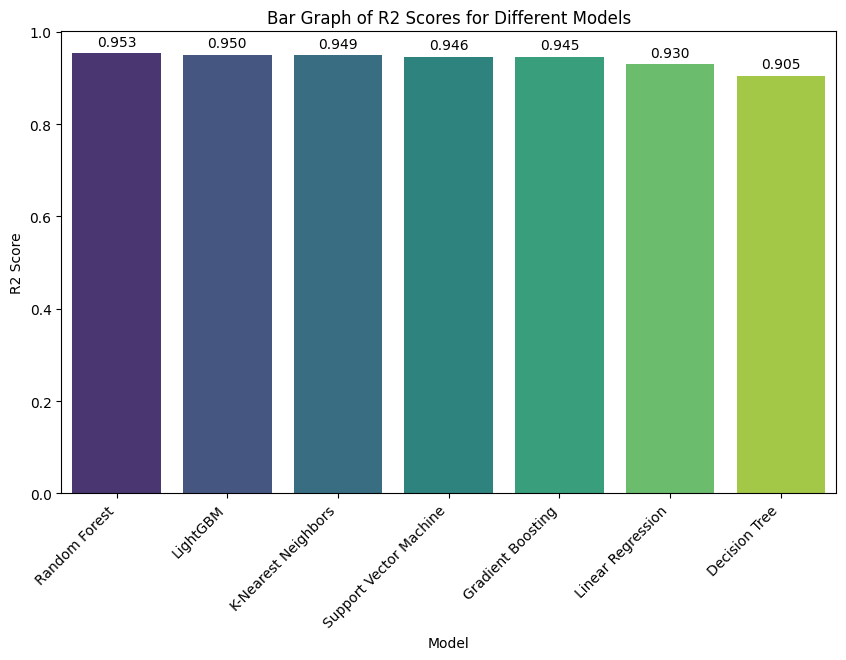

In [56]:
# Dictionary to store models and their predictions
models = {
    'Random Forest': (rf_model, y_pred_rf),
    'Linear Regression': (lr, y_pred_lr),
    'Support Vector Machine': (svm, y_pred_svm),
    'Gradient Boosting': (gb, y_pred_gb),
    'LightGBM': (lgb_model, y_pred_lgb),
    'K-Nearest Neighbors': (knn_model, y_pred_knn),
    'Decision Tree': (dt_model, y_pred_dt)
}

# List to store R2 scores
r2_scores = []

# Evaluate and print metrics for each model
for model_name, (model, y_pred) in models.items():
    r2 = r2_score(y_test, y_pred)

    # Append model and R2 score to the list
    r2_scores.append((model_name, r2))

# Sort models based on R2 score
sorted_models = sorted(r2_scores, key=lambda x: x[1], reverse=True)

# Bar graph for R2 scores with labels
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=[model[0] for model in sorted_models], y=[model[1] for model in sorted_models], palette="viridis")
plt.title("Bar Graph of R2 Scores for Different Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45, ha="right")

# Add R2 score labels on top of each bar
for index, value in enumerate(sorted_models):
    bar_plot.text(index, value[1] + 0.01, f"{value[1]:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

In [57]:
import pickle

# Serialize the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
